<a href="https://colab.research.google.com/github/Sam-krish2411/DATA-SCIENCE-ASSIGNMENT/blob/main/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install  ppscore

  Using cached pandas-1.5.3-cp312-cp312-linux_x86_64.whl
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.2
    Uninstalling pandas-2.3.2:
      Successfully uninstalled pandas-2.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2025.9.0 requires pandas>=2.2, but you have pandas 1.5.3 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
arviz 0.22.0 requires pandas>=2.1.0, but you have pandas 1

#**Data Preprocessing and Feature Engineering in Machine Learning**

**Introduction**

In the journey of building machine learning models, raw data often comes in an unstructured or incomplete form. Before applying any algorithm, it is essential to transform the dataset into a suitable format through data preprocessing and feature engineering. These steps not only improve the quality of the data but also enhance the performance, accuracy, and efficiency of machine learning models.

This assignment focuses on applying practical techniques of data preprocessing, feature engineering, and feature selection using the Adult Census Income Dataset, which predicts whether an individual's income exceeds $50K per year. The dataset contains both categorical and numerical attributes related to age, education, occupation, marital status, work hours, and more.

Through this assignment, we will:

- Handle missing values, duplicates, and inconsistent data.

- Encode categorical features and scale numerical features.

- Explore and visualize the dataset to identify important patterns.

- Engineer new features that may improve prediction accuracy.

- Apply feature selection methods such as Isolation Forest (to detect and handle outliers) and Predictive Power Score (PPS) (to evaluate feature importance).

By the end of this assignment, we will have a clean, well-structured, and optimized dataset that can be directly used for training robust machine learning models.

##**TASK -1: DATA PREPROCESSING**

In [7]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [6]:
#Load the dataset

df = pd.read_csv("adult_with_headers.csv")

In [8]:
# Display first 5 rows

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
# Basic Data Exploration

df.shape

(32561, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
#Checking for Null values

df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [13]:
#Identifing numerical and categorical columns

numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns

print("\nNumerical Features:", list(numerical_features))
print("Categorical Features:", list(categorical_features))


Numerical Features: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical Features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [14]:
# Scaling Numerical Features

# Standard Scaling (Mean=0, Std=1) - best when data follows normal distribution

scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_features] = scaler_standard.fit_transform(df[numerical_features])

print("\nFirst 5 rows after Standard Scaling:")
display(df_standard_scaled.head())



First 5 rows after Standard Scaling:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


In [15]:
# Min-Max Scaling (Range [0,1]) - best for preserving relationships and when distribution is not Gaussian

scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

print("\nFirst 5 rows after Min-Max Scaling:")
display(df_minmax_scaled.head())


First 5 rows after Min-Max Scaling:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


In [12]:
"""
#Discussion on Scaling Techniques#

1. Standard Scaling (Z-score Normalization):

       - Centers the data around mean = 0 with standard deviation = 1.
       - Preferred when features are normally distributed.
       - Commonly used in algorithms that assume Gaussian distribution
          (e.g., Logistic Regression, SVM, PCA).

2. Min-Max Scaling:

       - Transforms features to a fixed range (usually [0, 1]).
       - Preserves the shape of distribution but compresses values.
       - Preferred when features have varying units or when algorithms use
        distance metrics (e.g., KNN, Neural Networks).

        """

'\n#Discussion on Scaling Techniques#\n\n1. Standard Scaling (Z-score Normalization):\n\n       - Centers the data around mean = 0 with standard deviation = 1.\n       - Preferred when features are normally distributed. \n       - Commonly used in algorithms that assume Gaussian distribution \n          (e.g., Logistic Regression, SVM, PCA).\n\n2. Min-Max Scaling:\n\n       - Transforms features to a fixed range (usually [0, 1]).\n       - Preserves the shape of distribution but compresses values.\n       - Preferred when features have varying units or when algorithms use \n        distance metrics (e.g., KNN, Neural Networks).\n\n        '

##**TAST-2: ENCODING TECNIQUES**

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Identify categorical columns

categorical_features = df.select_dtypes(include=["object"]).columns
print("Categorical Features:", list(categorical_features))

Categorical Features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [18]:
# Separate columns based on number of unique categories

one_hot_cols = [col for col in categorical_features if df[col].nunique() <= 5]
label_encode_cols = [col for col in categorical_features if df[col].nunique() > 5]

print("\nColumns for One-Hot Encoding:", one_hot_cols)
print("Columns for Label Encoding:", label_encode_cols)


Columns for One-Hot Encoding: ['race', 'sex', 'income']
Columns for Label Encoding: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']


In [19]:
# 1. One-Hot Encoding (for categorical vars with <= 5 categories)

df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

In [20]:
# 2. Label Encoding (for categorical vars with > 5 categories)

label_encoders = {}
for col in label_encode_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # save encoders for later use

In [21]:
#Displaying the results

print("\nShape after Encoding:", df_encoded.shape)
print("\nEncoded Dataset (first 5 rows):")
display(df_encoded.head())



Shape after Encoding: (32561, 18)

Encoded Dataset (first 5 rows):


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K
0,39,7,77516,9,13,4,1,1,2174,0,40,39,False,False,False,True,True,False
1,50,6,83311,9,13,2,4,0,0,0,13,39,False,False,False,True,True,False
2,38,4,215646,11,9,0,6,1,0,0,40,39,False,False,False,True,True,False
3,53,4,234721,1,7,2,6,0,0,0,40,39,False,True,False,False,True,False
4,28,4,338409,9,13,2,10,5,0,0,40,5,False,True,False,False,False,False


In [19]:
"""
1. One-Hot Encoding

How it works:
      - Creates new binary (0/1) columns for each category.
      - Example: Sex = {Male, Female} → Sex_Male, Sex_Female.

#Pros:
       - No assumption of order between categories.
       - Works well with algorithms that rely on distance or linearity (e.g., Logistic Regression, KNN).

#Cons:
       - Increases dataset dimensionality (curse of dimensionality).
       - Can slow down training with high-cardinality features (e.g., Country with 100+ values).

2. Label Encoding

How it works:
       - Assigns each category an integer value.
       - Example: Occupation = {Tech, Sales, Farming} → {0, 1, 2}.

#Pros:
       - Simple and memory-efficient (does not increase dimensionality).
       - Useful for tree-based models (Decision Trees, Random Forest, XGBoost),
          which can handle encoded integers without assuming order.

#Cons:
      - Imposes an artificial ordinal relationship between categories (e.g., Tech=0, Sales=1, Farming=2),
         which may mislead algorithms that use distance metrics.
      - Not suitable for linear models unless combined with embeddings or target encoding.
      """

'\n1. One-Hot Encoding\n\nHow it works:\n      - Creates new binary (0/1) columns for each category.\n      - Example: Sex = {Male, Female} → Sex_Male, Sex_Female.\n\n#Pros:\n       - No assumption of order between categories.\n       - Works well with algorithms that rely on distance or linearity (e.g., Logistic Regression, KNN).\n\n#Cons:\n       - Increases dataset dimensionality (curse of dimensionality).\n       - Can slow down training with high-cardinality features (e.g., Country with 100+ values).\n\n2. Label Encoding\n\nHow it works:\n       - Assigns each category an integer value.\n       - Example: Occupation = {Tech, Sales, Farming} → {0, 1, 2}.\n\n#Pros:\n       - Simple and memory-efficient (does not increase dimensionality).\n       - Useful for tree-based models (Decision Trees, Random Forest, XGBoost), \n          which can handle encoded integers without assuming order.\n\n#Cons:\n      - Imposes an artificial ordinal relationship between categories (e.g., Tech=0, Sa

##**TASK-3: FEATURE ENGINEERING**

In [22]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Copy the dataset to avoid overwriting
df_fe = df_encoded.copy()

In [24]:
# 1. Create New Features

# (a) Age Group Feature
# Group ages into bins (Young, Middle-aged, Senior)

df_fe['age_group'] = pd.cut(
    df['age'],
    bins=[0, 25, 45, 65, 100],
    labels=['Young', 'Adult', 'Mid-Age', 'Senior']
)

# (b) Work Hours Category
# Categorize hours per week into groups

df_fe['work_hours_group'] = pd.cut(
    df['hours_per_week'],
    bins=[0, 20, 40, 60, 100],
    labels=['Part-time', 'Full-time', 'Overtime', 'Extreme']
)

print("\nNew Features Created: ['age_group', 'work_hours_group']")
display(df_fe[['age', 'age_group', 'hours_per_week', 'work_hours_group']].head(10))




New Features Created: ['age_group', 'work_hours_group']


,age,age_group,hours_per_week,work_hours_group
0,39,Adult,40,Full-time
1,50,Mid-Age,13,Part-time
2,38,Adult,40,Full-time
3,53,Mid-Age,40,Full-time
4,28,Adult,40,Full-time
5,37,Adult,40,Full-time
6,49,Mid-Age,16,Part-time
7,52,Mid-Age,45,Overtime
8,31,Adult,50,Overtime
9,42,Adult,40,Full-time


In [23]:
"""
RATIONALE BEHIND NEW FEATURES:

#1. Age Group (age_group)
    Rationale:
             - Income patterns often vary by age segments (e.g., young workers earn less, mid-age professionals peak, seniors may reduce work hours).
    Benefit:
             - Allows the model to capture non-linear relationships between age and income.

#2. Work Hours Category (work_hours_group)
    Rationale:
             - Income can be influenced by how much an individual works per week (e.g., part-timers usually earn less than overtime workers).
    Benefit:
             - Helps differentiate between part-time, standard, and overtime work patterns.

#3. Log Transformation on Capital-Gain (capital-gain-log)
    Rationale:
              - Capital-gain is highly skewed (many people have 0 gain, a few have very high values).
              - Skewed features can mislead algorithms that assume normality.
    Benefit:
              - Log transformation reduces skewness, spreads values more evenly, and makes the feature more informative for the model.
    """

'\nRATIONALE BEHIND NEW FEATURES:\n\n#1. Age Group (age_group)\n    Rationale:\n             - Income patterns often vary by age segments (e.g., young workers earn less, mid-age professionals peak, seniors may reduce work hours).\n    Benefit:\n             - Allows the model to capture non-linear relationships between age and income.\n\n#2. Work Hours Category (work_hours_group)\n    Rationale:\n             - Income can be influenced by how much an individual works per week (e.g., part-timers usually earn less than overtime workers).\n    Benefit:\n             - Helps differentiate between part-time, standard, and overtime work patterns.\n\n#3. Log Transformation on Capital-Gain (capital-gain-log)\n    Rationale:\n              - Capital-gain is highly skewed (many people have 0 gain, a few have very high values).\n              - Skewed features can mislead algorithms that assume normality.\n    Benefit:\n              - Log transformation reduces skewness, spreads values more even

In [25]:
# 2. Transformation of Skewed Feature

# Check skewness of numerical features

skewed_features = df[numerical_features].skew().sort_values(ascending=False)
print("\nSkewness of numerical features:\n", skewed_features)


Skewness of numerical features:
 capital_gain      11.953848
capital_loss       4.594629
fnlwgt             1.446980
age                0.558743
hours_per_week     0.227643
education_num     -0.311676
dtype: float64


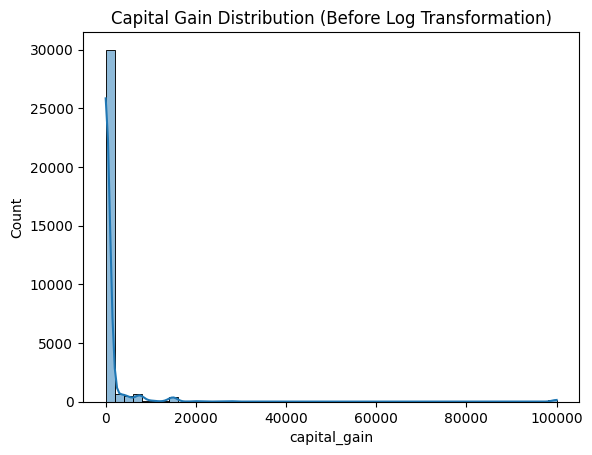

In [26]:
#  'Capital_gain' is usually highly skewed

sns.histplot(df['capital_gain'], bins=50, kde=True)
plt.title("Capital Gain Distribution (Before Log Transformation)")
plt.show()

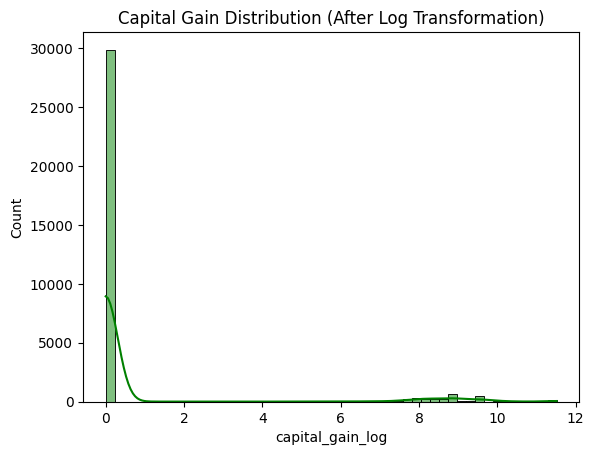


Feature Engineering completed. New dataset shape: (32561, 21)


In [27]:
# Apply log transformation to reduce skewness

df_fe['capital_gain_log'] = df['capital_gain'].apply(lambda x: np.log1p(x))  # log1p handles zero safely

sns.histplot(df_fe['capital_gain_log'], bins=50, kde=True, color='green')
plt.title("Capital Gain Distribution (After Log Transformation)")
plt.show()

print("\nFeature Engineering completed. New dataset shape:", df_fe.shape)

In [27]:
""" JUSTIFCATION FOR LOG TRANSFORMATION

The feature capital-gain in the Adult dataset is highly skewed:
              - Most individuals have a value of 0.
              - A small fraction of individuals have very high values.
              - This creates a long-tailed distribution (right-skewed).

Why this is a problem:
              - Skewed data can negatively impact machine learning models, especially those that assume normality
                 (e.g., Logistic Regression, Linear Regression).
              - Large outliers dominate the scale, reducing the ability of the model to learn meaningful patterns
                 from smaller but important variations.

Why log transformation helps:
              - The logarithm compresses large values and spreads out smaller values.
              - This reduces the effect of extreme outliers while preserving the overall order of data points.
              - It makes the distribution closer to normal, improving the model’s stability and performance.

In this assignment, we applied a log transformation (log1p) on capital-gain because it effectively
handles zero values  (by computing log(1 + x)) while reducing skewness.
"""

' JUSTIFCATION FOR LOG TRANSFORMATION\n\nThe feature capital-gain in the Adult dataset is highly skewed:\n              - Most individuals have a value of 0.\n              - A small fraction of individuals have very high values.\n              - This creates a long-tailed distribution (right-skewed).\n\nWhy this is a problem:\n              - Skewed data can negatively impact machine learning models, especially those that assume normality \n                 (e.g., Logistic Regression, Linear Regression).\n              - Large outliers dominate the scale, reducing the ability of the model to learn meaningful patterns \n                 from smaller but important variations.\n\nWhy log transformation helps:\n              - The logarithm compresses large values and spreads out smaller values.\n              - This reduces the effect of extreme outliers while preserving the overall order of data points.\n              - It makes the distribution closer to normal, improving the model’s s

##**TASK-4: FEATURE SELECTION**


In [1]:
!pip install --upgrade --quiet numpy scikit-learn pandas

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import ppscore as pps

In [28]:
# 1. Outlier Detection with Isolation Forest

# Work with numerical features only

num_data = df_fe[numerical_features]

In [29]:
# Apply Isolation Forest
iso = IsolationForest(contamination=0.02, random_state=42)  # contamination = % outliers expected
outliers = iso.fit_predict(num_data)


In [30]:
# Add outlier flag to dataset (-1 = outlier, 1 = inlier)
df_fe['outlier'] = outliers

print("\nOutlier counts:")
print(df_fe['outlier'].value_counts())



Outlier counts:
outlier
 1    31909
-1      652
Name: count, dtype: int64


In [31]:
# Remove outliers
df_no_outliers = df_fe[df_fe['outlier'] == 1].drop(columns=['outlier'])
print("\nShape after removing outliers:", df_no_outliers.shape)



Shape after removing outliers: (31909, 21)


In [32]:
# PPS is model-based, works for numeric & categorical
pps_matrix = pps.matrix(df_no_outliers)

print("\nPPS Matrix (first 10 rows):")
display(pps_matrix.head(10))



PPS Matrix (first 10 rows):


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.000000,regression,True,mean absolute error,0.7312,0.862138,DecisionTreeRegressor()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,76365.8804,77529.366217,DecisionTreeRegressor()
3,age,education,0.000000,regression,True,mean absolute error,2.6950,2.753765,DecisionTreeRegressor()
4,age,education_num,0.000000,regression,True,mean absolute error,1.8294,1.870954,DecisionTreeRegressor()
5,age,marital_status,0.173291,regression,True,mean absolute error,1.1392,0.941787,DecisionTreeRegressor()
6,age,occupation,0.000000,regression,True,mean absolute error,3.6808,3.692342,DecisionTreeRegressor()
7,age,relationship,0.019381,regression,True,mean absolute error,1.2580,1.233619,DecisionTreeRegressor()
8,age,capital_gain,0.000000,regression,True,mean absolute error,507.7826,928.266076,DecisionTreeRegressor()
9,age,capital_loss,0.000000,regression,True,mean absolute error,65.1458,124.808425,DecisionTreeRegressor()


In [33]:
# Inspect the pps_matrix to understand its structure and identify potential issues
print(pps_matrix.info())
print("\nValue counts of 'x' and 'y' columns:")
print(pps_matrix['x'].value_counts())
print(pps_matrix['y'].value_counts())
print("\nCheck for duplicate 'x' and 'y' pairs:")
print(pps_matrix.duplicated(subset=['x', 'y']).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x               441 non-null    object 
 1   y               441 non-null    object 
 2   ppscore         441 non-null    float64
 3   case            441 non-null    object 
 4   is_valid_score  441 non-null    bool   
 5   metric          420 non-null    object 
 6   baseline_score  441 non-null    float64
 7   model_score     441 non-null    float64
 8   model           420 non-null    object 
dtypes: bool(1), float64(3), object(5)
memory usage: 28.1+ KB
None

Value counts of 'x' and 'y' columns:
x
age                         21
workclass                   21
fnlwgt                      21
education                   21
education_num               21
marital_status              21
occupation                  21
relationship                21
capital_gain                21
capital_loss   

In [1]:
!pip install --quiet pandas==1.5.3 ppscore --upgrade

In [34]:
import pandas as pd
import ppscore as pps

In [38]:
num_df = num_df.fillna(0)  # or num_df.fillna(num_df.mean())


In [40]:
# Compute PPS matrix
pps_matrix = pps.matrix(df_no_outliers)

# Filter for the target variable only
pps_target = pps_matrix[pps_matrix['y'] == 'income'].sort_values(by='ppscore', ascending=False)

# Display top 10 predictive features
print("Top features predicting income (PPS):")
display(pps_target[['x','ppscore']].head(10))



Top features predicting income (PPS):


,x,ppscore


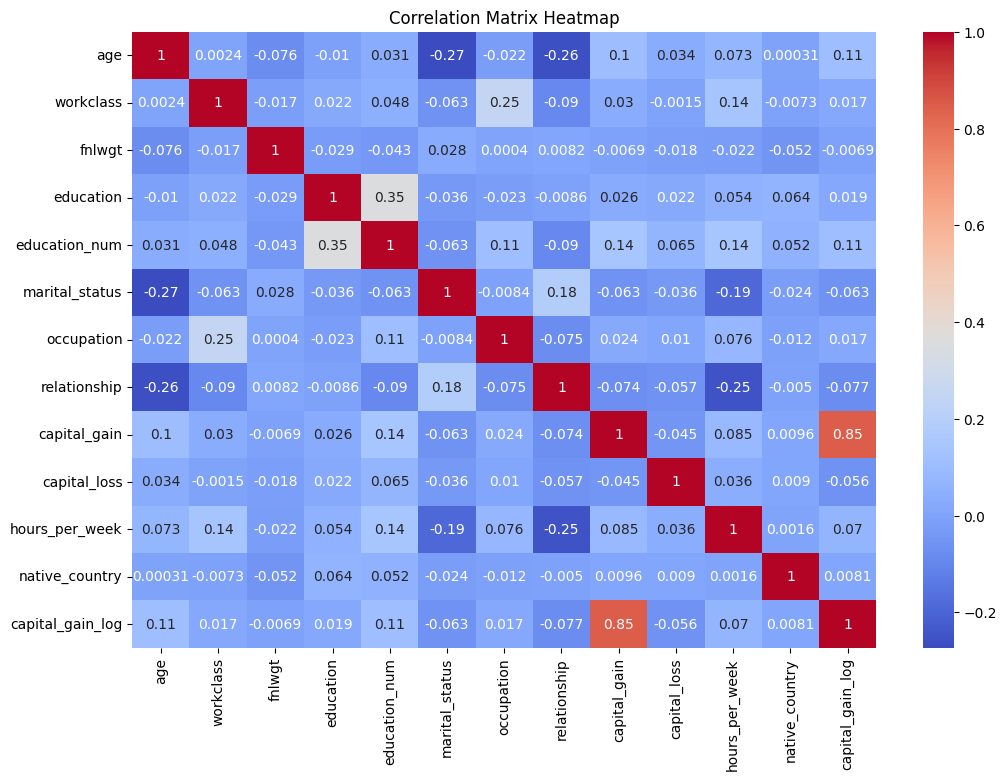

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(num_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

#**COMPARISON OF PPS AND cORRELATION MAP**



**Definition:**

A. Correlation: Measures the linear relationship between two numeric features. Values range from -1 to 1.

B. Predictive Power Score (PPS): Measures the predictive strength of any feature (numeric or categorical) for a target, capturing both linear and non-linear relationships. Values range from 0 to 1.

Feature Types:
     - Correlation works only on numeric features.
     - PPS works for numeric and categorical features, making it more flexible.

##Sensitivity to Relationships:

      - Correlation misses non-linear or categorical        relationships.
      - PPS identifies non-linear and categorical relationships that are predictive of the target.

Example from Adult Dataset:

      - marital_status has low correlation with income, so correlation analysis might ignore it.
      - PPS shows a non-zero score for marital_status, indicating it has predictive power.

**Interpretation:**

     - Correlation tells you how linearly related numeric features are.

    - PPS tells you how useful a feature is for predicting the target, making it more actionable for feature selection in machine learning.

**Conclusion:**

A. PPS is more comprehensive for feature selection in mixed datasets (numeric + categorical).

B. Correlation is simpler, useful for quick linear checks, but can miss important predictive relationships.